In [2]:
!pip install torch torch-geometric rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 17.4 MB/s eta 0:00:00


[05:04:07] Explicit valence for atom # 53 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 54 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 55 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 48 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom # 30 C, 5, is greater than permitted
[05:04:07] Explicit valence for atom #

Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Lote omitido

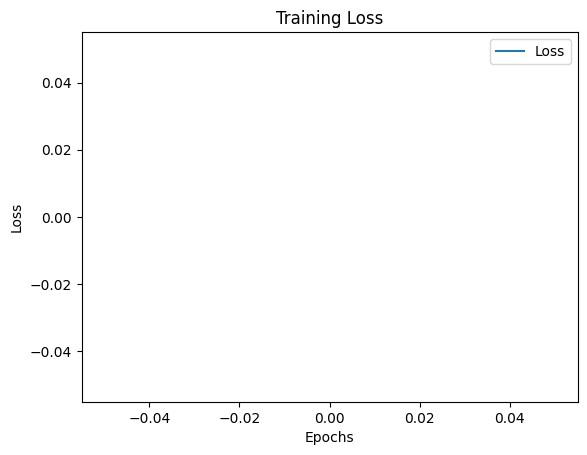

Modelo guardado como 'gcn_model.pth'
Modelo cargado


<ipython-input-8-64a4b0b4a821>:168: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("gcn_model.pth"))


TypeError: smiles_to_data() missing 1 required positional argument: 'label'

In [8]:
import pandas as pd
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool  # Importación corregida
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
import numpy as np

# Leer la base de datos filtrada
df = pd.read_csv('nueva_base.csv')

# Función para convertir secuencias en SMILES
#def sequence_to_smiles(sequence):
    # Aquí deberías implementar la conversión de la secuencia a SMILES,
    # dependiendo de cómo se representen químicamente tus péptidos.
    # Por ahora, vamos a asumir que ya tienes una función para hacerlo.
    # Ejemplo de conversión ficticia:
#    return sequence_to_smiles_conversion(sequence)

# Diccionario de aminoácidos a SMILES
amino_acids = {
    'A': 'CC(C(=O)O)N',  # Alanina
    'R': 'C(C[C@H](N)C(=O)O)N=C(N)N',  # Arginina
    'N': 'C(C(C(=O)O)N)C(=O)N',  # Asparagina
    'D': 'C(C(C(=O)O)N)C(=O)O',  # Ácido Aspártico
    'C': 'C(C(C(=O)O)N)S',  # Cisteína
    'Q': 'C(CC(=O)N)[C@H](N)C(=O)O',  # Glutamina
    'E': 'C(CC(=O)O)[C@H](N)C(=O)O',  # Ácido Glutámico
    'G': 'C(C(=O)O)N',  # Glicina
    'H': 'C1C(C(=O)O)CN=C1N',  # Histidina
    'I': 'CC[C@H](C)[C@H](N)C(=O)O',  # Isoleucina
    'L': 'CC(C)C[C@H](N)C(=O)O',  # Leucina
    'K': 'C(CCN)[C@H](N)C(=O)O',  # Lisina
    'M': 'CSCC[C@H](N)C(=O)O',  # Metionina
    'F': 'C1=CC=C(C=C1)[C@H](C(=O)O)N',  # Fenilalanina
    'P': 'C1CC(NC1)C(=O)O',  # Prolina
    'S': 'C(C(C(=O)O)N)O',  # Serina
    'T': 'C[C@H](O)[C@H](N)C(=O)O',  # Treonina
    'W': 'C1=CNC2=CC=CC=C21[C@H](C(=O)O)N',  # Triptófano
    'Y': 'C1=CC=C(C=C1)C(C(=O)O)N',  # Tirosina
    'V': 'CC(C)[C@H](N)C(=O)O',  # Valina
}

# Función para convertir una secuencia de aminoácidos a SMILES
def sequence_to_smiles(sequence):
    smiles = ""
    for aa in sequence:
        smiles += amino_acids.get(aa, "")  # Obtén el SMILES del aminoácido
    return smiles

# Función para convertir SMILES a objeto Data
def smiles_to_data(smiles, label):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Ignorar si no se puede convertir el SMILES

    # Obtener matriz de adyacencia
    adjacency_matrix = GetAdjacencyMatrix(mol)
    edge_index = torch.tensor(np.array(np.nonzero(adjacency_matrix)), dtype=torch.long)

    # Obtener características de los nodos (átomos)
    features = []
    for atom in mol.GetAtoms():
        features.append(atom.GetAtomicNum())  # Usar el número atómico como característica

    x = torch.tensor(features, dtype=torch.float).view(-1, 1)  # Convertir a tensor de PyTorch

    # Etiquetas (0 para "Otros", 1 para "Antibacterial")
    y = torch.tensor([1 if label == 'Antibacterial' else 0], dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)

# Crear una lista de objetos Data para el entrenamiento
data_list = []
for _, row in df.iterrows():
    smiles = sequence_to_smiles(row['Seqence'])
    data = smiles_to_data(smiles, row['Activity'])
    if data is not None:
        data_list.append(data)

# Crear un DataLoader
loader = DataLoader(data_list, batch_size=32, shuffle=True, drop_last=True)  # Añadido drop_last=True


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)  # De 1 a 16 canales
        self.conv2 = GCNConv(16, 32)
        self.fc = torch.nn.Linear(32, 2)  # Clasificación binaria (Antibacterial, Otros)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = global_mean_pool(x, data.batch)  # Pooling global corregido
        x = self.fc(x)
        return x

# Entrenar el modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Definir el modelo y la pérdida
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

# Entrenar por 50 épocas
# Entrenamiento
epochs = 50
for epoch in range(epochs):
    model.train()
    for data in loader:
        optimizer.zero_grad()

        # Depuración: imprime el tamaño de data.x y data.y en cada lote
        print(f"Tamaño de data.x: {data.x.size()}, Tamaño de data.y: {data.y.size()}")

        # Verifica que el tamaño de las etiquetas coincida con el tamaño de salida
        out = model(data)
        if out.size(0) != data.y.size(0):
            print(f"Discrepancia en el tamaño del lote: out.size(0) = {out.size(0)}, data.y.size(0) = {data.y.size(0)}")
            continue  # Salta este lote para evitar errores

        # Calcular la pérdida y retropropagar
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")


print("Entrenamiento completado.")

[05:54:06] Explicit valence for atom # 53 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 54 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 55 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 17 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 48 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom # 30 C, 5, is greater than permitted
[05:54:06] Explicit valence for atom #

Epoch 1, Loss: 0.5097248945917402, Accuracy: 0.0045911933499755515
Lote omitido por tamaño inconsistente
Epoch 2, Loss: 0.5144213017295388, Accuracy: 0.0055147058823529415
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Epoch 3, Loss: 0.5171573722001278, Accuracy: 0.0051926704895679625
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Epoch 4, Loss: 0.5096363416223815, Accuracy: 0.005250525052505251
Lote omitido por tamaño inconsistente
Lote omitido por tamaño inconsistente
Epoch 5, Loss: 0.5237271523836887, Accuracy: 0.004312654441409806
Lote omitido por tamaño inconsistente
Epoch 6, Loss: 0.5040082659791497, Accuracy: 0.004109899661759982
Epoch 7, Loss: 0.5126592329570225, Accuracy: 0.006277805239742956
Lote omitido por tamaño inconsistente
Epoch 8, Loss: 0.5091060391243767, Accuracy: 0.004464285714285714
Lote omitido por tamaño inconsistente
Epoch 9, Loss: 0.5139800502973444, Accuracy: 0.003981163200044235
Epoch 10, Loss: 0.51170

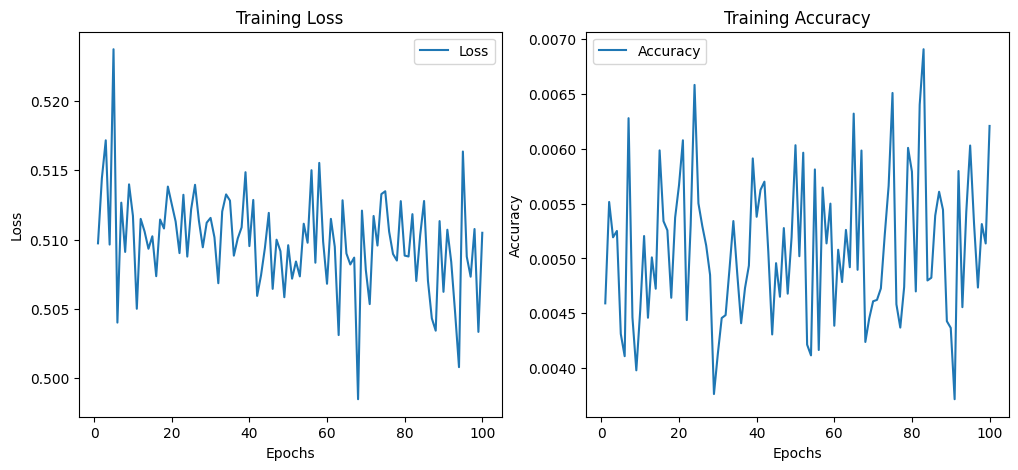

Modelo guardado como 'gcn_model.pth'
Modelo cargado
Predicción: Antibacterial


<ipython-input-13-4cc2f55175e3>:153: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("gcn_model.pth"))


In [13]:
import pandas as pd
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
import numpy as np
import matplotlib.pyplot as plt

# Leer la base de datos filtrada
df = pd.read_csv('nueva_base.csv')

# Diccionario de aminoácidos a SMILES
amino_acids = {
    'A': 'CC(C(=O)O)N',  # Alanina
    'R': 'C(C[C@H](N)C(=O)O)N=C(N)N',  # Arginina
    'N': 'C(C(C(=O)O)N)C(=O)N',  # Asparagina
    'D': 'C(C(C(=O)O)N)C(=O)O',  # Ácido Aspártico
    'C': 'C(C(C(=O)O)N)S',  # Cisteína
    'Q': 'C(CC(=O)N)[C@H](N)C(=O)O',  # Glutamina
    'E': 'C(CC(=O)O)[C@H](N)C(=O)O',  # Ácido Glutámico
    'G': 'C(C(=O)O)N',  # Glicina
    'H': 'C1C(C(=O)O)CN=C1N',  # Histidina
    'I': 'CC[C@H](C)[C@H](N)C(=O)O',  # Isoleucina
    'L': 'CC(C)C[C@H](N)C(=O)O',  # Leucina
    'K': 'C(CCN)[C@H](N)C(=O)O',  # Lisina
    'M': 'CSCC[C@H](N)C(=O)O',  # Metionina
    'F': 'C1=CC=C(C=C1)[C@H](C(=O)O)N',  # Fenilalanina
    'P': 'C1CC(NC1)C(=O)O',  # Prolina
    'S': 'C(C(C(=O)O)N)O',  # Serina
    'T': 'C[C@H](O)[C@H](N)C(=O)O',  # Treonina
    'W': 'C1=CNC2=CC=CC=C21[C@H](C(=O)O)N',  # Triptófano
    'Y': 'C1=CC=C(C=C1)C(C(=O)O)N',  # Tirosina
    'V': 'CC(C)[C@H](N)C(=O)O',  # Valina
}

# Función para convertir una secuencia de aminoácidos a SMILES
def sequence_to_smiles(sequence):
    smiles = ""
    for aa in sequence:
        smiles += amino_acids.get(aa, "")
    return smiles

# Función para convertir SMILES a objeto Data
def smiles_to_data(smiles, label):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Ignorar si no se puede convertir el SMILES

    adjacency_matrix = GetAdjacencyMatrix(mol)
    edge_index = torch.tensor(np.array(np.nonzero(adjacency_matrix)), dtype=torch.long)

    features = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
    x = torch.tensor(features, dtype=torch.float).view(-1, 1)

    y = torch.tensor([1 if label == 'Antibacterial' else 0], dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)

# Crear una lista de objetos Data para el entrenamiento
data_list = []
for _, row in df.iterrows():
    smiles = sequence_to_smiles(row['Seqence'])
    data = smiles_to_data(smiles, row['Activity'])
    if data is not None:
        data_list.append(data)

# Crear un DataLoader
loader = DataLoader(data_list, batch_size=32, shuffle=True, drop_last=True)

# Definir el modelo
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 32)
        self.fc = torch.nn.Linear(32, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = global_mean_pool(x, data.batch)
        x = self.fc(x)
        return x

# Entrenar el modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 100
losses = []
accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    num_batches = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)

        if out.size(0) != data.y.size(0):
            print("Lote omitido por tamaño inconsistente")
            continue

        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()

    avg_loss = epoch_loss / num_batches
    accuracy = correct / (num_batches * data.batch.size(0))
    losses.append(avg_loss)
    accuracies.append(accuracy)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}, Accuracy: {accuracy}")

# Graficar las pérdidas y precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()

# Guardar el modelo
torch.save(model.state_dict(), "gcn_model.pth")
print("Modelo guardado como 'gcn_model.pth'")

# Cargar el modelo y hacer predicción para una muestra
model = GCN().to(device)
model.load_state_dict(torch.load("gcn_model.pth"))
model.eval()
print("Modelo cargado")

# Predicción para una muestra
sample_smiles = sequence_to_smiles("ILGKFCDEIKRIV")  # Secuencia de ejemplo
sample_data = smiles_to_data(sample_smiles, 'Antibacterial')
sample_data = sample_data.to(device)

with torch.no_grad():
    out = model(sample_data)
    predicted_class = torch.argmax(out, dim=1).item()
    if predicted_class == 1:
        print("Predicción: Antibacterial")
    else:
        print("Predicción: Otros")